In [1]:
# 量子フーリエ変換を量子回路で構築するソースコード
# 必要なモジュールをインポート
import numpy as np
from numpy import pi
import math
import matplotlib.pyplot as plt
%matplotlib inline
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.visualization import plot_histogram
import warnings
warnings.simplefilter('ignore')

In [2]:
# 関数を定義
def qft_rotate_single(circuit, i):
    circuit.h(i)
    for qubit in reversed(range(0, i)):
        circuit.cp(pi/2**(i - qubit), qubit, i)
        
def qft(circuit, n):
    for i in reversed(range(n)):
        qft_rotate_single(circuit, i)
    for i in range(math.floor(n/2)):
        circuit.swap(i, n - (i + 1))

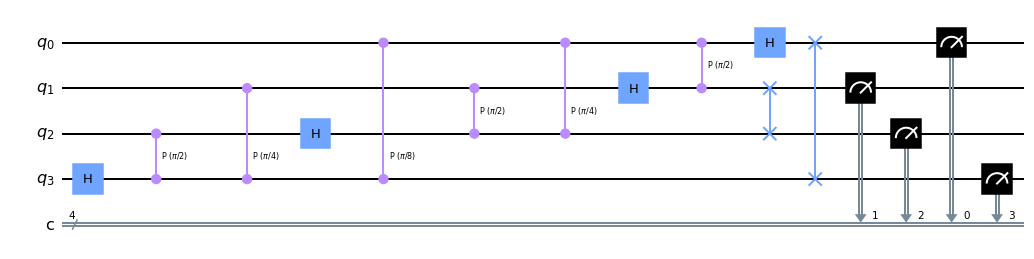

In [5]:
# 量子回路を生成
n = 4 
qc = QuantumCircuit(n, n)

qft(qc, n)
# 測定する。
for i in range(n):
    qc.measure(i, i)
# 回路を描画する
qc.draw('mpl')

{'0110': 531, '0010': 509, '0101': 543, '1010': 512, '0001': 502, '0011': 540, '0111': 471, '1011': 522, '1111': 503, '1101': 551, '1100': 502, '0100': 516, '0000': 498, '1110': 510, '1000': 484, '1001': 498}


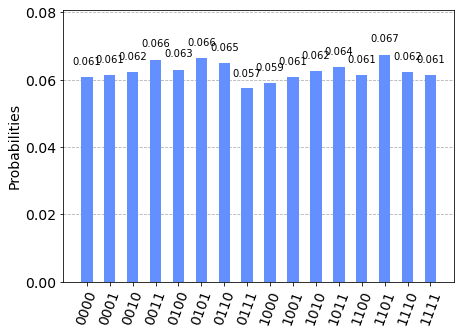

In [6]:
backend = Aer.get_backend('qasm_simulator')
shots = 8192
results = execute(qc, backend=backend, shots=shots).result()
answer = results.get_counts()

print(answer)
plot_histogram(answer)